In [ ]:
#IMPORTANDO AS BIBLIOTECAS

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV

In [3]:
#IMPORTANDO A BASE DE DADOS

In [4]:
df = pd.read_excel('C:\\Users\\Lucas\\Documents\\IA\\Dry_Bean_Dataset\\Dry_Bean_Dataset.xlsx') #ALTERAR O CAMINHO DO ARQUIVO PARA O DA SUA MÁQUINA

In [ ]:
#VISÃO GERAL DOS DADOS

In [3]:
df.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


In [4]:
df.shape

(13611, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [7]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
#INFORMAÇÕES ALVO

In [8]:
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [9]:
df['Class'].value_counts()

Class
DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: count, dtype: int64

In [ ]:
#VISUALIZAÇÃO DA COLUNA DE CLASSES

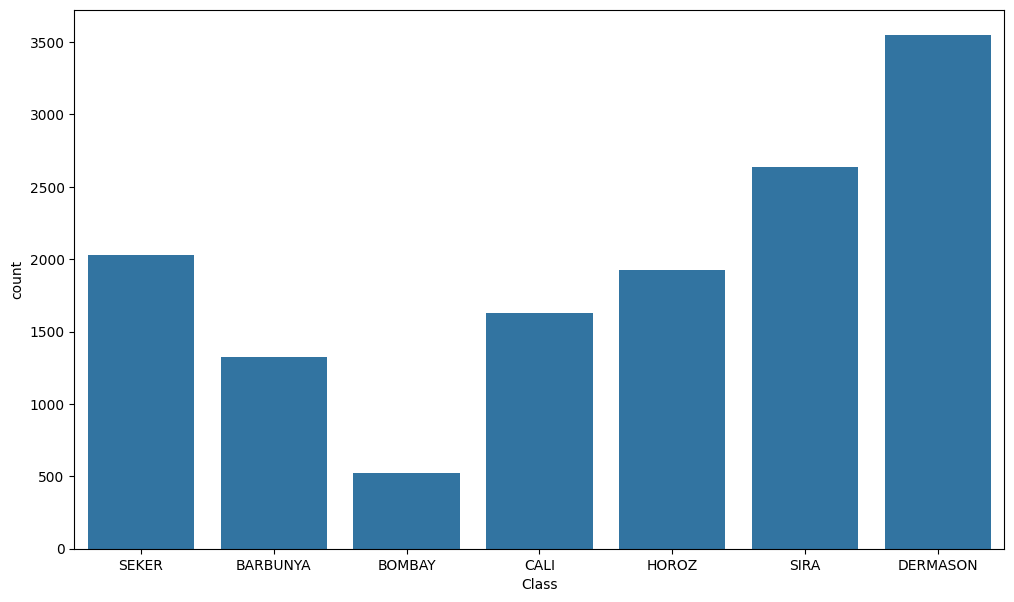

In [10]:
plt.figure(figsize=(12,7))
sns.countplot(x='Class', data=df)
plt.show()

In [ ]:
#TRABALHANDO COM OS DADOS

In [11]:
labelencoder = LabelEncoder()
df["Class"] = labelencoder.fit_transform(df['Class'])

df.head(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
5,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,5
6,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,5
7,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,5
8,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,5
9,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,5


In [ ]:
#DIVIDINDO DADOS EM SUBCONJUNTOS DE TREINAMENTO E TESTE

In [12]:
X = df.drop(columns='Class')
y = df['Class']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [ ]:
#CALCULANDO A IMPORTNCIA DOS ATRITUTOS

[0.06374535 0.07574285 0.07237014 0.0749402  0.07229703 0.07062112
 0.06495513 0.07158578 0.01429831 0.01806744 0.06053496 0.07574012
 0.08220288 0.07037449 0.08486528 0.02765892]


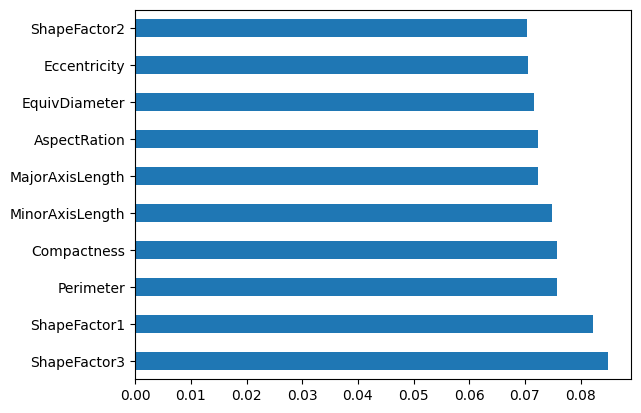

In [18]:
model = ExtraTreesClassifier(n_estimators=500, random_state=42)
model.fit(X,y)
print(model.feature_importances_)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
#RECURSOS DE PADRONIZAÇÃO

In [ ]:
scaler_X = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

In [14]:
#MODELO DE TRINO

In [15]:
forest = RandomForestClassifier(n_estimators=10, 
                                random_state=42, 
                                max_depth=8, 
                                max_features=5, 
                                min_samples_leaf=5)

forest.fit(X_train_scaled, y_train)
y_pred = forest.predict(X_test_scaled)

In [ ]:
#CLASSIFICAÇÃO E PRECISÃO

In [16]:
from sklearn.metrics import classification_report,accuracy_score
print('Accuracy: %.5f' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=np.unique(labelencoder.inverse_transform(y))))

Accuracy: 0.91737
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.85      0.89       261
      BOMBAY       1.00      1.00      1.00       117
        CALI       0.89      0.94      0.92       317
    DERMASON       0.90      0.92      0.91       671
       HOROZ       0.97      0.95      0.96       408
       SEKER       0.97      0.93      0.95       413
        SIRA       0.86      0.89      0.87       536

    accuracy                           0.92      2723
   macro avg       0.93      0.92      0.93      2723
weighted avg       0.92      0.92      0.92      2723

